# Barplot: Barras, barras e mais barras!

Nessa aula além de nos aprofundarmos em como criar e usar gráficos de barra, vamos exercitar a customização de alguns aspectos do gráfico através dos argumento (ou parâmetros) que podemos passar para as funções do seaborn.

## 1. Barplots

Nesta aula, vamos criar nossos gráficos usando a função `sns.barplot()`. Vamos continuar trabalhando com gráficos de barras, mas agora com otura função e para fazer mais do que contas. Gráficos de barra são muito utéis pois são fáceis de interpretar e podem ser usados para comparar diferentes categorias de uma variável categórica, uma tarefa muito comum.

Antes de partirmos para a criação do gráfico propriamente dita, vamos repetir as linhas de código para cumprir etapas preliminares.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cartoes = pd.read_csv("https://bit.ly/dados_cartoes")
cartoes.head(5)

,data_pgto,ano,mes,forma_pagamento,valor,tipo_despesa,nome_fornecedor,cpf_servidor,mandato,posicao_mandato
0,2003-01-02,2003,1,Débito,1696.90,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.010.008-**,Lula (1º Mandato),1
1,2003-01-02,2003,1,Débito,1336.60,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.010.008-**,Lula (1º Mandato),1
2,2003-01-02,2003,1,Débito,1396.43,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.868.251-**,Lula (1º Mandato),1
3,2003-01-03,2003,1,Débito,105.00,MATERIAL P/MANUTENÇÃO DE BENS MÓVEIS,SEBASTIO ALVES DE SOUSA - ME,***.262.328-**,Lula (1º Mandato),1
4,2003-01-03,2003,1,Débito,200.00,MATERIAL P/MANUTENÇÃO DE BENS MÓVEIS,JOÃO LEITE NETO - ME - JLN ELETRONICOS,***.262.328-**,Lula (1º Mandato),1


# Gráficos de barra realizando agregação de dados

Como a biblioteca `seaborn` tem o objetivo de simplificar nossa tarefa de criação de gráficos, ela já possui funções que realizam a agregação de dados automaticamente. Isso significa que, ainda que passemos dados em que a unidade de análise não é a mesma que a desejada para o gráfico (categoria sendo representada), a função `barplot()` já realiza essa tarefa automaticamente.

No entanto, é importante termos consciência de como essa função funciona, qual seu valor padrão e como podemos alterá-lo. Para isso, vamos criar um gráfico de barras simples, passando nosso conjunto de dados

<Axes: xlabel='valor', ylabel='mandato'>

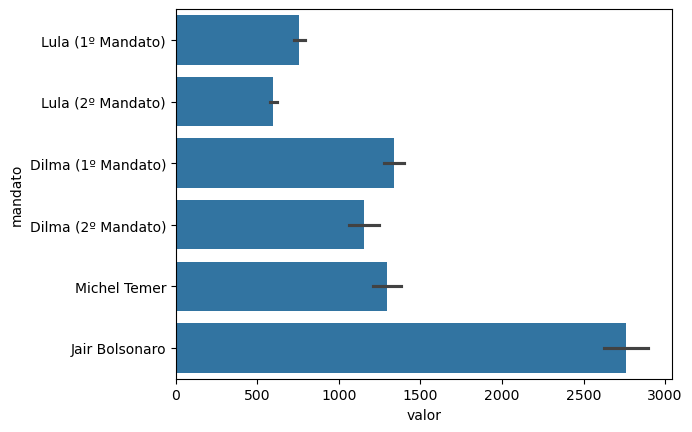

In [2]:
sns.barplot(
    y="mandato",
    x="valor",
    data=cartoes,
)

O que está acontecendo com esse gráfico? Por que há uma linha no meio das barras criadas?

Como cada categoria de `"mandato"` aparece em múltiplas linhas, a função `barplot()` está realizando a média dos valores de `"idade"` para cada categoria. Isso é o valor padrão da função  [podemos conferir essas informações na documentação da função: https://seaborn.pydata.org/generated/seaborn.barplot.html](https://seaborn.pydata.org/generated/seaborn.barplot.html)

Estamos preocupados com os argumentos `estimator` e `errorbar`.

O primeiro é a função que será aplicada aos dados para realizar a agregação. Seu valor padrão `"mean"` indica que a média será calculada. 

O segundo é um argumento booleano que indica se queremos ou não e como adicionar barras de erro ao gráfico. O valor padrão indica que um intervalo de confiança de 95% é calculado. 

Não precisamos nos preocupar com o significado exato desse intervalo, mas é importante saber é uma medida do erro do valor médio considerando que está sendo feita uma estimativa. Isso não se aplica ao nosso caso porque temos o valor de todas as transações, não uma amostra.

Vamos remover isso.


<Axes: xlabel='valor', ylabel='mandato'>

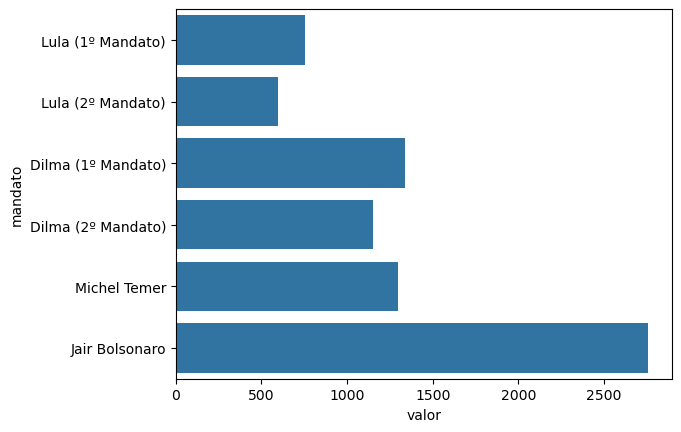

In [3]:
sns.barplot(
    y="mandato",
    x="valor",
    errorbar=None,
    data=cartoes,
)

A partir daqui vamos fazer todos os gráficos com a opção de `errorbar=None` (importante que o N seja maiúsculo!).

Podemos calcular o valor médio para cada categoria introduzindo novamente o argumento `hue`

<Axes: xlabel='valor', ylabel='mandato'>

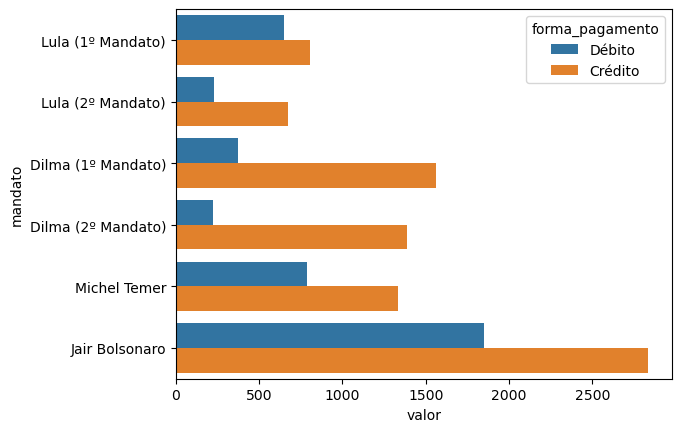

In [4]:
sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    errorbar=None,
    data=cartoes,
)

Agora, em vez de calcular o valor médio vamos calcular o gasto total feito em cada mandato. Para isso, vamos mudar a função de agregação. Se por padrão o `estimator="mean"` (média) queremos que seja `estimator="sum"` (soma).

<Axes: xlabel='valor', ylabel='mandato'>

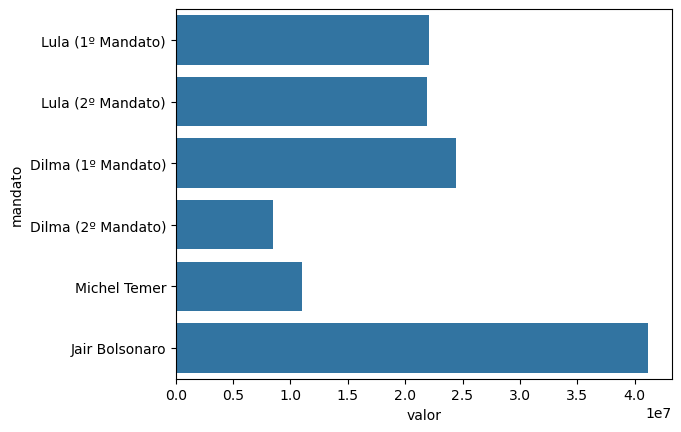

In [5]:
sns.barplot(
    y="mandato",
    x="valor",
    estimator="sum",
    errorbar=None,
    data=cartoes,
)

Um elemento importante a se notar é que há uma informação importante no eixo Y. A indicação "1e7" significa que o eixo Y está em notação científica. Isso acontece porque os valores são muito grandes. Vamos ignorar esse detalhe por enquanto, mas ao longo do curso vamos ver formas de alterar esse comportamento.

Em nosso caso específico, isso significa que o valor do eixo Y significa dezenas de milhões de reais (10^7).

Vamos repetir o gráfico novamente distinguindo a forma de pagamento

Podemos mudar isso com o método `plt.ticklabel_format(style='plain', axis='y')`.

<Axes: xlabel='valor', ylabel='mandato'>

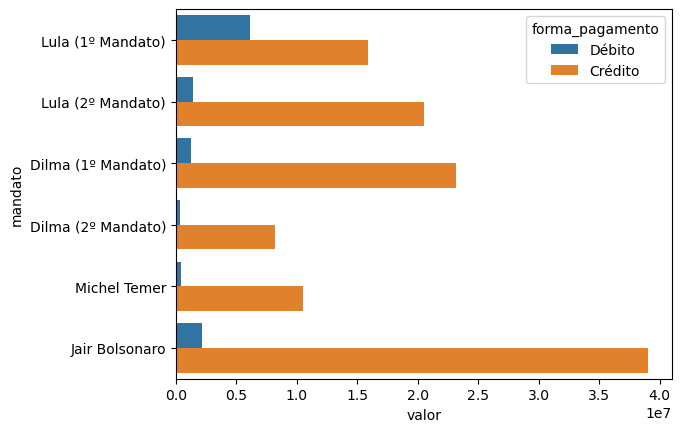

In [6]:
sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    estimator="sum",
    errorbar=None,
    data=cartoes,
)

Apesar de o ano ser uma variável numérica, podemos pensar nele como uma categoria. Com isso, tratamos cada ano como um conjunto totalmente diferente, e calculamos os gastos em cada um dele.

Obs: Em versões anteriores do seaborn onde as barras são coloridas esse gráfico ficará especialmente estranho devido ao número de categorias.

<Axes: xlabel='ano', ylabel='valor'>

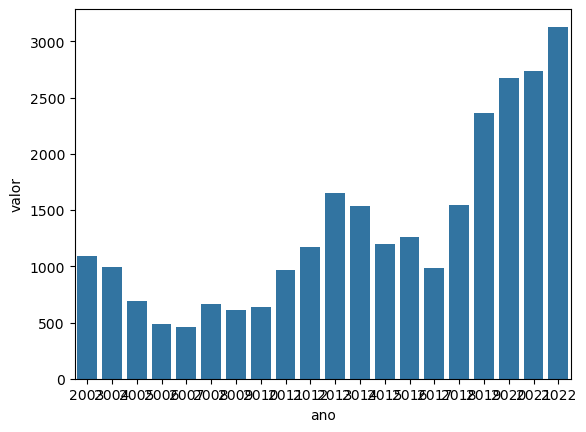

In [7]:
sns.barplot(
    x="ano",
    y="valor",
    errorbar=None,
    data=cartoes,
)

Poderíamos tornar os nomes (labels) do eixo X legíveis com algumas estratégias, além de invertar os gráficos. Por exemplo, rotacionar os labels para não se sobreporem (e.g. escritos na vertical); se tratando de anos pular alguns já que avançamos um ano em cada barra; ou ainda aumentar a largura do gráfico. Vamos começar a ver isso na próxima aula, mas vamos ver um exemplo já com nosso gráfico por ano:

<Axes: xlabel='ano', ylabel='valor'>

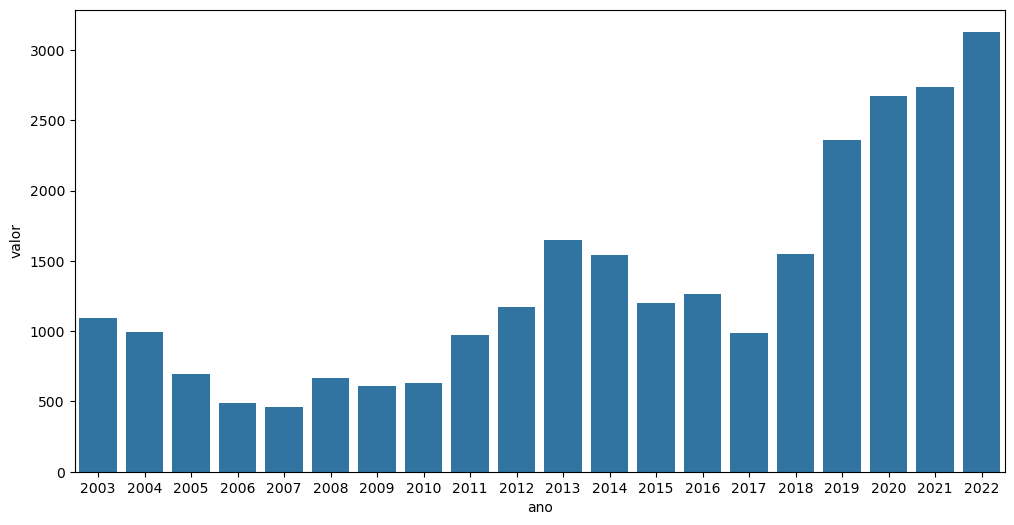

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    x="ano",
    y="valor",
    errorbar=None,
    data=cartoes,
    ax=ax,
)

# Controlando a cor dos gráficos

Para ajustar a cor desejada dos gráficos no seaborn nós temos 2 argumentos a ser utilizados:  `color` e `palette`.

Quando queremos usar uma mesma cor para todo o gráfico (quando não usamos a codificação de cor pelo argumento `hue`), usamos o argumento `color`.

Vamos usar 2 formas principais para escolher a cor que desejamos usar em nossos gráficos. A primeira é usando o nome da cor. Contudo, o seaborn não aceita qualquer nome de cor (ou não pode imaginar como nós faríamos). Assim, há um conjunto limitado de cores que podemos passar usando seu nome (assim como passamos o nome de colunas, usando aspas). Uma listagem completa pode ser encontrada na documentação do matplotlib: [https://matplotlib.org/stable/_images/sphx_glr_named_colors_001_2_00x.png](https://matplotlib.org/stable/_images/sphx_glr_named_colors_001_2_00x.png)

Vamos destacar aqui a lista de cores mais longa, com um grande número de variações:

<img src="https://matplotlib.org/2.1.0/_images/sphx_glr_named_colors_001.png" alt="Color names" style="width: 800px;"/>

E também um outro conjunto de cores que são replicam a paleta de cores do programa Tableau:

<img src="https://matplotlib.org/stable/_images/sphx_glr_named_colors_002_2_00x.png" alt="Tableau colors" style="width: 800px;"/>

Para usar essas cores, basta passar o nome da cor como uma string para o argumento `color`. Vamos ajustar nosso gráfico por mandato usando esse argumento

<Axes: xlabel='valor', ylabel='mandato'>

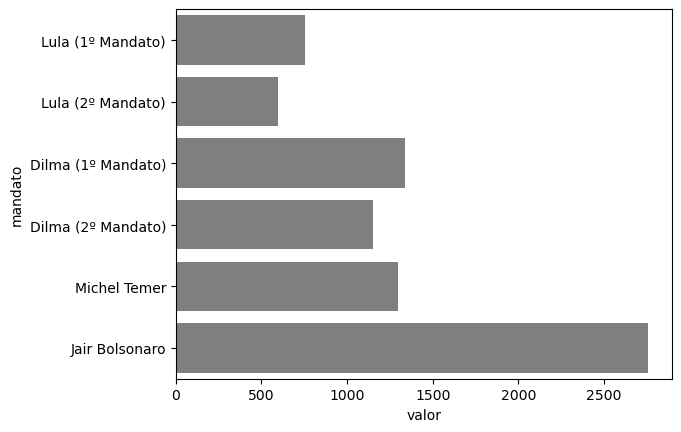

In [9]:
sns.barplot(
    y="mandato",
    x="valor",
    color="tab:gray",
    estimator="mean",  # essa linha é opcional
    errorbar=None,
    data=cartoes,
)

Podemos também usar o código hexadecimal da cor que desejamos. O código hexadecimal é uma forma de representar cores que é comumente usada em design, e suportada também por linguagens de programação. Ele é composto por 6 caracteres, que podem ser números de 0 a 9 ou letras de A a F, e podemos escolher a cor que desejamos com precisão através de várias ferramentas existentes.

Por exemplo, no próprio Google Search podemos pesquisar por "colour picker" e escolher a cor que desejamos, ou acessar o link: [https://g.co/kgs/hJsq1Hd](https://g.co/kgs/hJsq1Hd). O código hexadecimal da cor escolhida é exibido na tela na caixa `HEX`.

Para isso, em vez de passar o nome da cor basta passar o código hexadecimal como uma string para o argumento `color`. Vamos ajustar nosso gráfico alterando a cor das barras para um tom específico de azul.

<Axes: xlabel='valor', ylabel='mandato'>

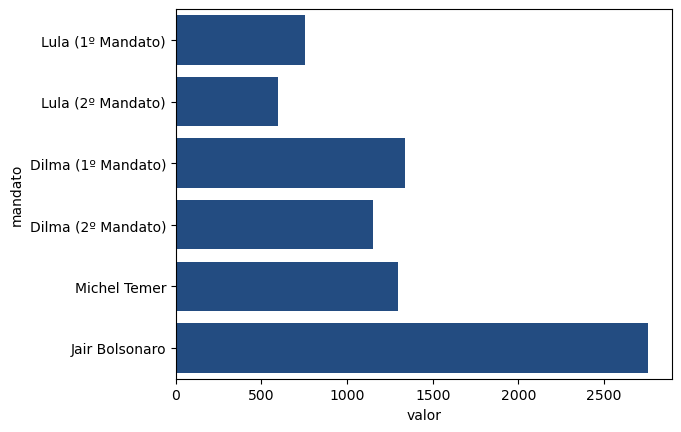

In [10]:
sns.barplot(
    y="mandato",
    x="valor",
    color="#134a91",
    estimator="mean",  # essa linha é opcional
    errorbar=None,
    data=cartoes,
)

Contudo, nem sempre queremos fazer gráficos monocromáticos! No geral são uma boa ideia.

Contudo, podemos precisar de mais cores para:

1. Representar categorias diferentes
2. Destacar uma categoria específica (e.g. a categoria que estamos destacando em nosso texto)
3. Manter a coerência das categorias do eixo X com outros gráficos

Nesses casos, precisamos utilizar o argumento `palette`.

Vamos definir as cores que queremos usar para cada forma de pagamento. Para isso, vamos passar uma lista de cores para o argumento `palette` e reintroduzir o `hue`.

Para montar essa lista, devemos passar a sequência de cores que desejamos usar separada por `,` entre colchetes (`[` e `]`). Podemos usar tanto os nomes das cores quanto os códigos hexadecimais. Vamos ajustar nosso gráfico para usar uma paleta de cores específica.

<Axes: xlabel='valor', ylabel='mandato'>

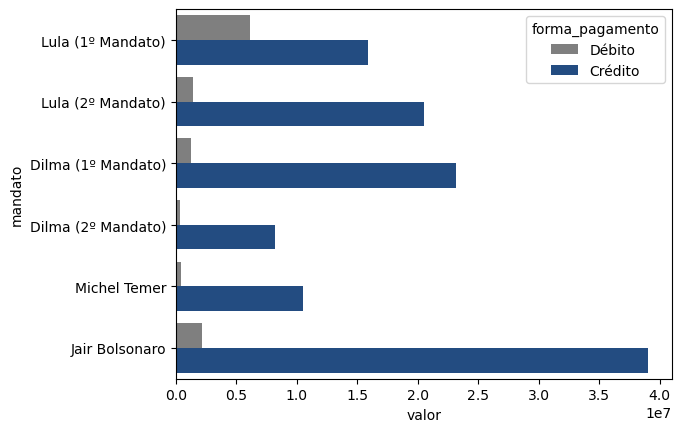

In [11]:
sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    palette=["tab:gray", "#134a91"],
    estimator="sum",
    errorbar=None,
    data=cartoes,
)

# Gráficos finais

Apenas para ilustração, vou deixar aqui o código que usaria para criar um gráfico com todas as customizações que poderia ser incluído em um relatório ou artigo científico.

Vamos ver muitas dessas outras customizações ao longo do curso.

In [12]:
# Essas linhas criam configurações para as linhas de grade e deixar a legenda menos destacada em relação aos dados
plt.rcParams["axes.edgecolor"] = "lightgray"
plt.rcParams["ytick.color"] = "dimgrey"
plt.rcParams["xtick.color"] = "dimgrey"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams["axes.axisbelow"] = True

Primeiro, para o valor médio de transação por mandato destacando o valor no mandato de Bolsonaro:

/var/folders/mj/j3hv11_n2k52jb10d4y2k5d00000gn/T/ipykernel_38291/2514515958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


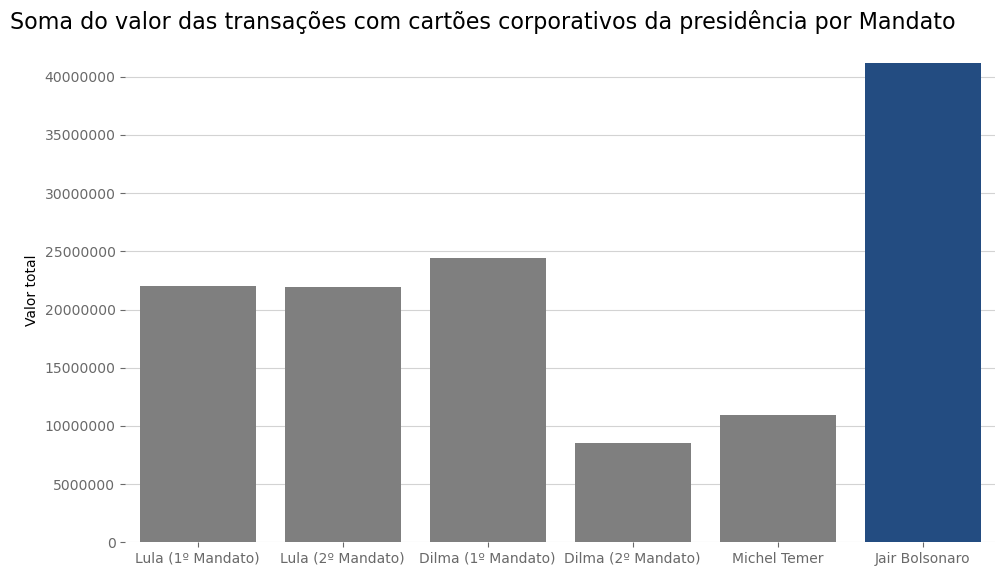

In [61]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# remove bordas do gráfico
sns.despine(left=True, bottom=True)

sns.barplot(
    x="mandato",
    y="valor",
    estimator="sum",
    errorbar=None,
    hue="mandato",
    palette={
        "Lula (1º Mandato)": "tab:gray",
        "Lula (2º Mandato)": "tab:gray",
        "Dilma (1º Mandato)": "tab:gray",
        "Dilma (2º Mandato)": "tab:gray",
        "Michel Temer": "tab:gray",
        "Jair Bolsonaro": "#134a91",
    },
    data=cartoes,
)

# remove notação científica
ax.get_yaxis().get_major_formatter().set_scientific(False)

# título
ax.set_title(
    "Soma do valor das transações com cartões corporativos da presidência por Mandato",
    loc="left",
    x=0,
    y=0.92,
    fontsize=16,
    transform=fig.transFigure,
)
# nome eixo y
ax.set_ylabel("Valor total")
# remove nome do eixo
ax.set_xlabel("")

plt.show()

Valor médio das transações por mandato e forma de pagamento:

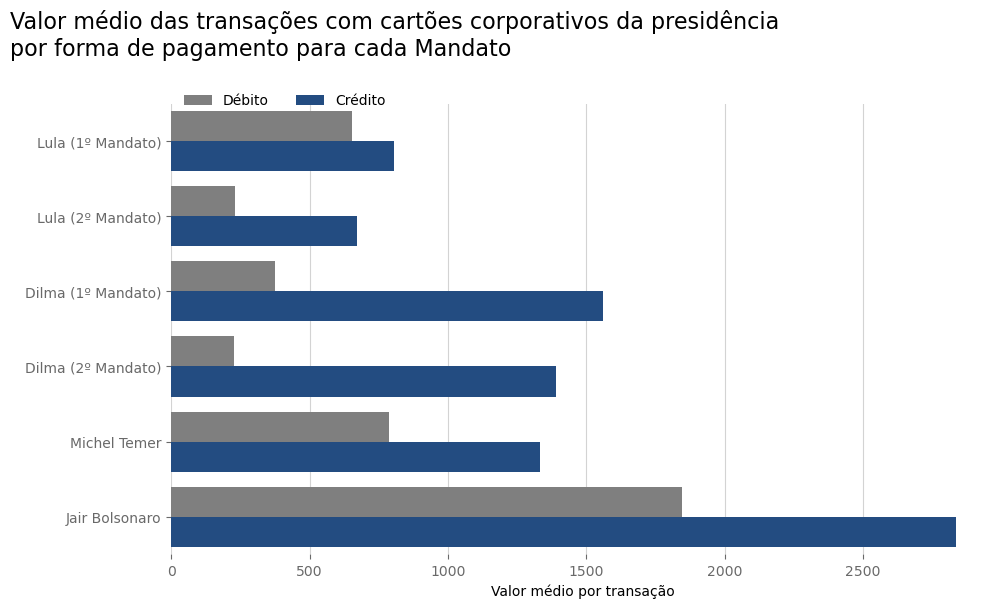

In [68]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# remove bordas do gráfico
sns.despine(left=True, bottom=True)

sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    estimator="mean",
    errorbar=None,
    palette={
        "Crédito": "#134a91",
        "Débito": "tab:gray",
    },
    data=cartoes,
)

# título
ax.set_title(
    "Valor médio das transações com cartões corporativos da presidência\npor forma de pagamento para cada Mandato",
    loc="left",
    fontsize=16,
    x=0,
    y=0.93,
    transform=fig.transFigure,
)
# nome eixo X
ax.set_xlabel("Valor médio por transação")
# remove nome do eixo Y
ax.set_ylabel("")

# ajusta legenda
ax.legend(
    # title="Forma de Pagamento",
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    ncol=3,
)

plt.show()

Text(0, 0.5, '')

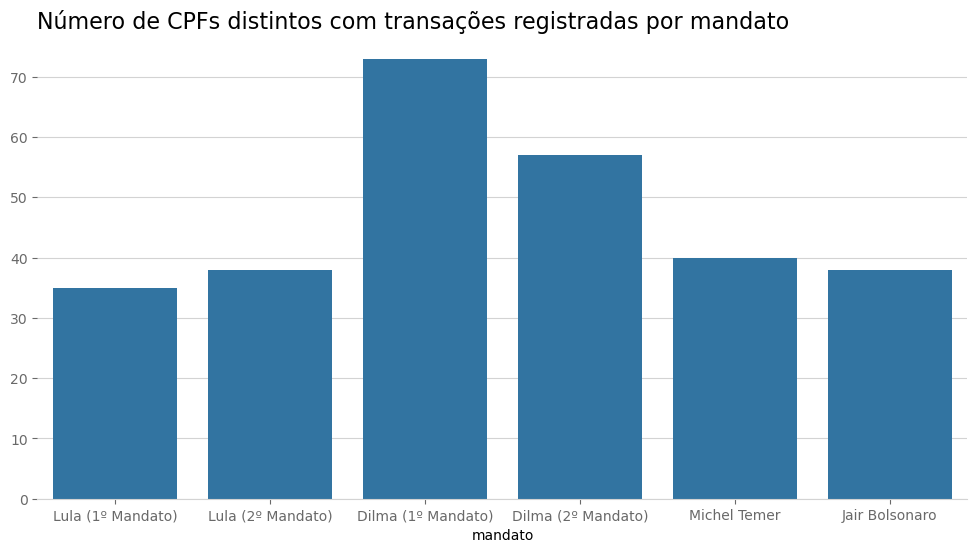

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.despine(left=True,)

# numero de cpfs por mandato
sns.barplot(
    data=cartoes.groupby("mandato", as_index=False, sort=False).agg(
        {"cpf_servidor": "nunique"}
    ),
    x="mandato",
    y="cpf_servidor",
    ax=ax,
)

ax.set_title("Número de CPFs distintos com transações registradas por mandato", loc="left", fontsize="16")
ax.set_ylabel("")